# Matplotlib basics


In this jupyter notebook, we will present some of the basics on matplotlib. I'm sure that if you've ever used matplotlib to create figures, at some point you were confused by the terminology. For example, normally you would create labels for your x-axis using 
<br>
```python
plt.xlabel('my xlabel')
```
and then when looking for examples online you would see something like 
```python
axes.set_xlabel('my xlabel') 
```
instead.


### Two interfaces: MATLAB & object oriented

From the matplotlib homepage we can see why differences like this arise: _"For simple plotting the pyplot module provides a __MATLAB-like interface__, particularly when combined with IPython. For the power user, you have full control of line styles, font properties, axes properties, etc, via an __object oriented interface__ or via a set of functions familiar to MATLAB users."_

Let's import the matplotlib module, and create some random x- and y-data to plot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.random.random(100)

y1 = x + np.random.normal(loc=0,scale=0.1,size=100)

y2 = np.sin(x/(0.05*np.pi))


### The MATLAB interface

The MATLAB interface is often the easiest way to quickly plot some results. If you normally use MATLAB, you see that the syntax is pretty much the same

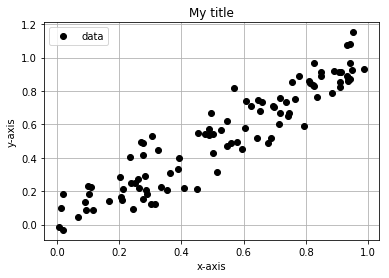

In [2]:
plt.figure()
plt.plot(x,y1,'ko',label='data')
plt.grid()
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('My title')
plt.legend()
plt.savefig('plot_MATLAB_1.png')

Another example using a scatterplot and colorbars:

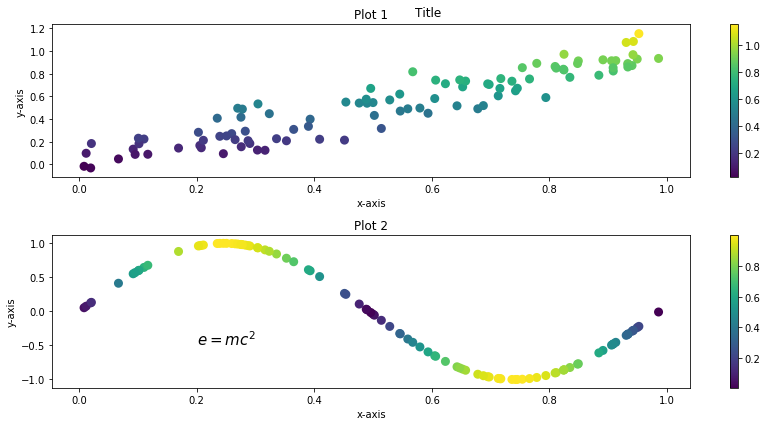

In [3]:
plt.figure(figsize=(12,6)) #figsize is in inches
plt.subplot(211)
plt.scatter(x,y1,c=np.abs(y1),linewidths=3)
plt.colorbar()
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot 1')

plt.subplot(212)
plt.scatter(x,y2,c=np.abs(y2),linewidths=3)
plt.colorbar()
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Plot 2')
plt.text(0.2,-0.5,'$e = mc^2$',fontsize=15)

plt.suptitle('Title')

#plt.subplots_adjust(top=0.8,hspace=0.6)
plt.tight_layout()

### The Object oriented interface

Now lets recreate the original scatter plot using the object oriented interface. One of the easiest ways to invoke the object oriented interface is using the plt.subplots function, which returns a tuple containing two objects: a figure and an axes. Consider the figure as your canvas, which can contain multiple axes.

![fig_map.png](fig_map.png)

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


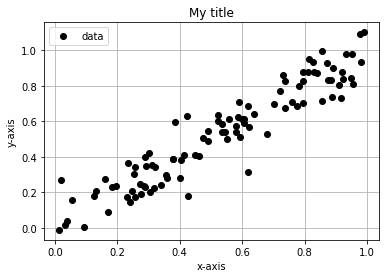

In [11]:
fig,ax = plt.subplots(1) 
ax.plot(x,y1,'ko',label='data')
ax.grid()
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('My title')
ax.legend()
plt.savefig('plot_OO_1.png')

print(type(fig))
print(type(ax))

To make this concept more clear, I now create one figure containing two subplots. If we inspect the types again, we see that the `ax` is now a numpy array instead of an axes object. If we take a closer look at ax, we see that it containts two sets of axes

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>


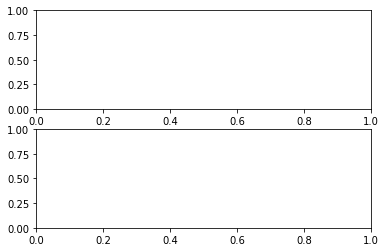

In [12]:
fig,ax = plt.subplots(2)
print(type(fig))
print(type(ax))
print(ax)

'All roads lead to Rome': there are many ways to do the same thing, below you can see some variations to invoke the object-oriented interface. Some give you more control but might be more difficult to get right. For example: in the `add_axes` function you specify exactly where your axes are located in your figure, whereas this is done automatically in the add_subplot function.

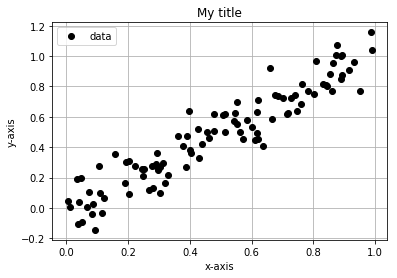

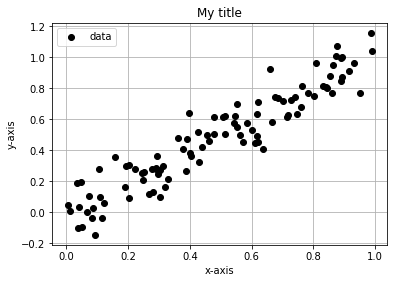

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111) # n_rows, n_columns, subplot
ax.plot(x,y1,'ko',label='data')
ax.grid()
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('My title')
ax.legend()

fig = plt.figure()
ax = fig.add_axes([0.125,0.11,0.775,0.77]) # x_origin, y_origin, width, height
ax.plot(x,y1,'ko',label='data')
ax.grid()
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('My title')
ax.legend()

In the beginning this object oriented interface might just seem inconvenient. It is the way to go when creating more complicated plots however, and when including packages like cartopy it is necessary. One example where we loop through an axes object to create sine waves with different periods, instead of creating 9 plots by hand:

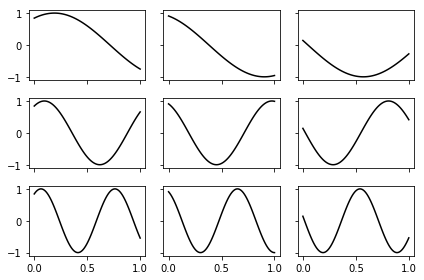

In [218]:
x = np.linspace(0,1,100)

fig,axes = plt.subplots(3,3,sharex='col',sharey='row')

for i1 in range(axes.shape[0]):
    for i2 in range(axes.shape[1]):
        y = np.sin((i2+1)+3*(i1+1)*x)
        axes[i1,i2].plot(x,y,'k-')
        
plt.tight_layout() #an useful command to get the spacing between the plots nicer
        

A more complicated example, where x- and y-axis are shared, and a colorbar is wanted per row:

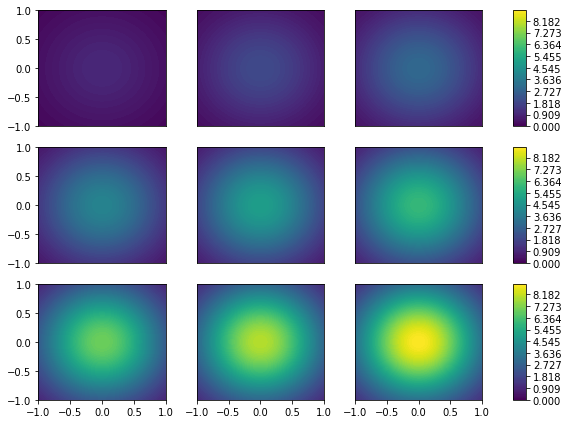

In [8]:
X,Y = np.meshgrid(np.linspace(-1,1,50),np.linspace(-1,1,50))

fig, axes = plt.subplots(nrows=3, ncols=4,
                        gridspec_kw={'height_ratios': [1, 1, 1],'width_ratios': [1, 1, 1, 0.1]},figsize=(8, 6))

for i1 in range(axes.shape[0]):
    for i2 in range(axes.shape[1]):

        ampl = 1 + i2 + i1*3
        
        if i2 < 3:
            im = axes[i1,i2].contourf(X,Y,ampl*np.exp(-(X**2+Y**2)),levels=np.linspace(0,9,100))

        if i2 == 3:
            cbar = plt.colorbar(im,cax=axes[i1,i2])
            
        if 0 < i2 < 3:
            axes[i1,i2].set_yticks([])
        if i1 != 2 and i2 < 3:
            axes[i1,i2].set_xticks([])
            
plt.tight_layout()

# Extra: full anatomy of a plot
![Description](matplotlib_anatomy.png)